In [15]:
%%time 

# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 
# Install Folium for Geographic data visualization
!pip install folium
# Install plotlyExpress
!pip install plotly_express

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
python3-gdal is already the newest version (2.2.3+dfsg-2).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-rtree is already the newest version (0.8.3+ds-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-aa20g302
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-aa20g302
CPU times: user 204 ms, sys: 99.3 ms, total: 303 ms
Wall time: 20.4 s


In [16]:
#Importar librerías necesarias

import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as spopt
import scipy.fftpack as spfft
import scipy.ndimage as spimg
import cvxpy as cvx
import geopandas as gpd
from mpl_toolkits import mplot3d

In [17]:
#Filtrar el catálogo por año

df_catalogo = gpd.read_file("catalogo_sismos.csv")
df_catalogo['ANO'] = df_catalogo['ANO'].astype('int')
#filtro1=df_catalogo[df_catalogo['ANO']>= 2000]
#filtro1=df_catalogo[df_catalogo['ANO']<= 2010]
filtro1=df_catalogo[df_catalogo['ANO']> 2010]
df_punto2 = filtro1[['MAGNITUD','coordenadaX','coordenadaY','DEPTH']]

In [18]:
#Eliminar datos nulos

nan_value = float("NaN")
df_punto2.replace("", nan_value, inplace=True)
df_punto2.dropna(inplace=True)
df_punto2

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,MAGNITUD,coordenadaX,coordenadaY,DEPTH
29122,2.9,1101540.11,1242477.09,140.8
29135,2.8,1109832.972,1242051.02,145.7
29157,2.1,1111262.681,1245704,147.3
29199,2.6,1103636.222,1244803.803,146.1
29204,2.3,1104190.718,1243920.042,143.9
...,...,...,...,...
84869,2.3,1100876.136,1242807.648,150
84893,3.1,1103638.367,1243697.759,151
84937,1.7,1095014.869,1243792.35,144
85004,2.7,1104195.021,1241707.953,147


In [19]:
#Convertir las variables a float

df_punto2['MAGNITUD'] = df_punto2['MAGNITUD'].astype('float')
df_punto2['coordenadaX'] = df_punto2['coordenadaX'].astype('float')
df_punto2['coordenadaY'] = df_punto2['coordenadaY'].astype('float')
df_punto2['DEPTH'] = df_punto2['DEPTH'].astype('float')
print(df_punto2.dtypes)

MAGNITUD       float64
coordenadaX    float64
coordenadaY    float64
DEPTH          float64
dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

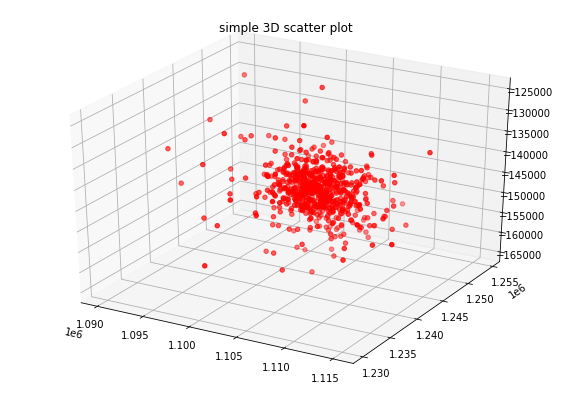

In [20]:
#Scatter plot 3D

z=df_punto2['DEPTH']
y=df_punto2['coordenadaY']
x=df_punto2['coordenadaX']

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(x, y, -1000*z, color = "red")
plt.title("simple 3D scatter plot")

plt.savefig('sismos_caso03.png', dpi=400)  
plt.show()


In [21]:
#Cálculo de los valores del centroide

z_prom=np.mean(z*-1000)
x_prom=np.mean(x)
y_prom=np.mean(y)

puntocentral=np.vstack((x_prom, y_prom, z_prom))
puntocentral

array([[1103522.97469477],
       [1245036.28281977],
       [-146525.87209302]])

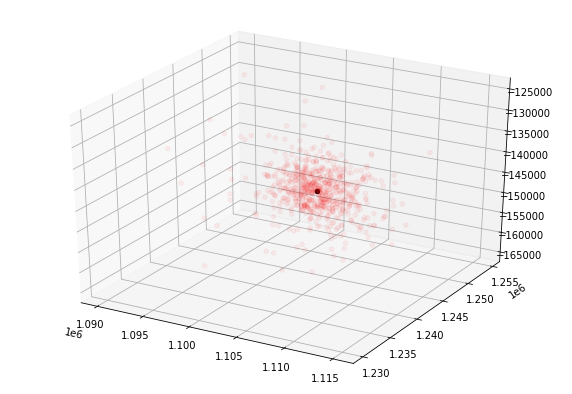

In [22]:
#Scatter plot 3D con el centroide

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(x, y, -1000*z, color = "red", alpha=0.05)
ax.scatter3D(x_prom, y_prom, z_prom, color = "black", alpha=1)

plt.savefig('centroide_caso03.png', dpi=400)
plt.show()